[['i', 'just', 'finished', 'cycling', '243', 'km', 'in', '7m43s', 'with', 'endomondo', 'endorphins'], ['i', 'just', 'finished', 'cycling', '330', 'km', 'in', '14m41s', 'with', 'endomondo', 'endorphins'], ['i', 'just', 'finished', 'cycling', '2109', 'km', 'in', '1h21m12s', 'with', 'endomondo', 'endorphins'], ['i', 'just', 'finished', 'running', '879', 'km', 'in', '51m09s', 'with', 'endomondo', 'endorphins'], ['i', 'just', 'finished', 'running', '128', 'km', 'in', '8m40s', 'with', 'endomondo', 'endorphins'], ['i', 'was', 'out', 'walking', '028', 'km', 'with', 'endomondo', 'endorphins'], ['i', 'just', 'finished', 'running', '122', 'km', 'in', '9m13s', 'with', 'endomondo', 'endorphins'], ['i', 'just', 'finished', 'running', '082', 'km', 'in', '4m17s', 'with', 'endomondo', 'endorphins'], ['i', 'just', 'finished', 'cycling', '265', 'km', 'in', '28m00s', 'with', 'endomondo', 'endorphins'], ['i', 'just', 'finished', 'cycling', '3856', 'km', 'in', '3h51m22s', 'with', 'endomondo', 'endorphins'],

running iteration 1
converged
1:  8428 tweets
--> SSE : 1630.8318137384053


------ Running K means for experiment no. 2 for k = 2
running iteration 0
running iteration 1
running iteration 2
converged
1:  6079 tweets
2:  2349 tweets
--> SSE : 1411.256631330094


------ Running K means for experiment no. 3 for k = 3
running iteration 0
running iteration 1
converged
1:  1874 tweets
2:  6548 tweets
3:  6 tweets
--> SSE : 1082.9269667238482


------ Running K means for experiment no. 4 for k = 4
running iteration 0
running iteration 1
converged
1:  6077 tweets
2:  2347 tweets
3:  2 tweets
4:  2 tweets
--> SSE : 1410.877933105242


------ Running K means for experiment no. 5 for k = 5
running iteration 0
running iteration 1
running iteration 2
converged
1:  4677 tweets
2:  2345 tweets
3:  2 tweets
4:  2 tweets
5:  1402 tweets
--> SSE : 1277.3609195816973


------ Running K means for experiment no. 6 for k = 6
running iteration 0
running iteration 1
converged
1:  5368 tweets
2:  8 tweets
3: 

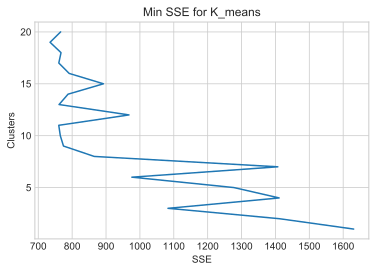

Min Sum of squared Error at K=19


running iteration 0
running iteration 1
running iteration 2
converged
1:  2105 tweets
2:  1175 tweets
3:  3198 tweets
4:  2 tweets
5:  10 tweets
6:  1864 tweets
7:  2 tweets
8:  2 tweets
9:  2 tweets
10:  2 tweets
11:  36 tweets
12:  2 tweets
13:  2 tweets
14:  2 tweets
15:  4 tweets
16:  2 tweets
17:  8 tweets
18:  2 tweets
19:  8 tweets


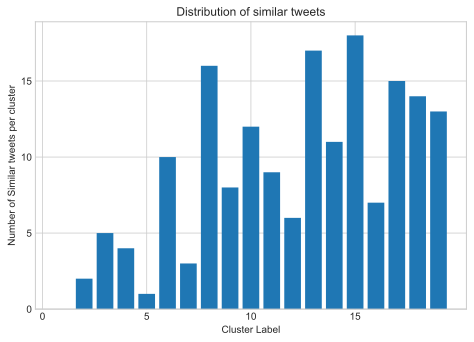

18


In [6]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import random as rd
import pandas as pd
import re
import math
import string
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def pre_process_tweets(url):

    df = pd.read_csv(url)
    tweets = list(df.tweet)
    list_of_tweets=[]
    for i in range(len(tweets)):
       

       
        # Remove any word that starts with the symbol @
        tweets[i] = " ".join(filter(lambda x: x[0] != '@', tweets[i].split()))
        spl_word="https://"
        tweets[i]=tweets[i].partition(spl_word)[0]
        spl_word="www"
        tweets[i]=tweets[i].partition(spl_word)[0]
        # Remove any URL
        tweets[i] = re.sub(r"http\S+", "", tweets[i])
        tweets[i] = re.sub(r"www\S+", "", tweets[i])

        # remove colons from the end of the sentences (if any) after removing url
        tweets[i] = tweets[i].strip()
        tweet_len = len(tweets[i])
        if tweet_len > 0:
            if tweets[i][len(tweets[i]) - 1] == ':':
                tweets[i] = tweets[i][:len(tweets[i]) - 1]

        # Remove any hash-tags symbols
        tweets[i] = tweets[i].replace('#', '')

        # Convert every word to lowercase
        tweets[i] = tweets[i].lower()

        # remove punctuations
        tweets[i] = tweets[i].translate(str.maketrans('', '', string.punctuation))

        # trim extra spaces
        tweets[i] = " ".join(tweets[i].split())

        # convert each tweet from string type to as list<string> using " " as a delimiter
        list_of_tweets.append(tweets[i].split(' '))

    
    return list_of_tweets


def k_means(tweets, k=4, max_iterations=50):

    centroids = []

    # initialization, assign random tweets as centroids
    count = 0
    hash_map = dict()
    while count < k:
        random_tweet_idx = rd.randint(0, len(tweets) - 1)
        if random_tweet_idx not in hash_map:
            count += 1
            hash_map[random_tweet_idx] = True
            centroids.append(tweets[random_tweet_idx])

    iter_count = 0
    prev_centroids = []

    # run the iterations until not converged or until the max iteration in not reached
    while (is_converged(prev_centroids, centroids)) == False and (iter_count < max_iterations):

        print("running iteration " + str(iter_count))

        # assignment, assign tweets to the closest centroids
        clusters = assign_cluster(tweets, centroids)

        # to check if k-means converges, keep track of prev_centroids
        prev_centroids = centroids

        # update, update centroid based on clusters formed
        centroids = update_centroids(clusters)
        iter_count = iter_count + 1

    if (iter_count == max_iterations):
        print("max iterations reached, K means not converged")
    else:
        print("converged")

    sse = compute_SSE(clusters)

    return clusters, sse


def is_converged(prev_centroid, new_centroids):

    # false if lengths are not equal
    if len(prev_centroid) != len(new_centroids):
        return False

    # iterate over each entry of clusters and check if they are same
    for c in range(len(new_centroids)):
        if " ".join(new_centroids[c]) != " ".join(prev_centroid[c]):
            return False

    return True


def assign_cluster(tweets, centroids):

    clusters = dict()

    # for every tweet iterate each centroid and assign closest centroid to a it
    for t in range(len(tweets)):
        min_dis = math.inf
        cluster_idx = -1;
        for c in range(len(centroids)):
            dis = getDistance(centroids[c], tweets[t])
            # look for a closest centroid for a tweet

            if centroids[c] == tweets[t]:
                # print("tweet and centroid are equal with c: " + str(c) + ", t" + str(t))
                cluster_idx = c
                min_dis = 0
                break

            if dis < min_dis:
                cluster_idx = c
                min_dis = dis

        # randomise the centroid assignment to a tweet if nothing is common
        if min_dis == 1:
            cluster_idx = rd.randint(0, len(centroids) - 1)

        # assign the closest centroid to a tweet
        clusters.setdefault(cluster_idx, []).append([tweets[t]])
        # print("tweet t: " + str(t) + " is assigned to cluster c: " + str(cluster_idx))
        # add the tweet distance from its closest centroid to compute sse in the end
        last_tweet_idx = len(clusters.setdefault(cluster_idx, [])) - 1
        clusters.setdefault(cluster_idx, [])[last_tweet_idx].append(min_dis)

    return clusters


def update_centroids(clusters):

    centroids = []

    # iterate each cluster and check for a tweet with closest distance sum with all other tweets in the same cluster
    # select that tweet as the centroid for the cluster
    for c in range(len(clusters)):
        min_dis_sum = math.inf
        centroid_idx = -1

        # to avoid redundant calculations
        min_dis_dp = []

        for t1 in range(len(clusters[c])):
            min_dis_dp.append([])
            dis_sum = 0
            # get distances sum for every of tweet t1 with every tweet t2 in a same cluster
            for t2 in range(len(clusters[c])):
                if t1 != t2:
                    if t2 < t1:
                        dis = min_dis_dp[t2][t1]
                    else:
                        dis = getDistance(clusters[c][t1][0], clusters[c][t2][0])

                    min_dis_dp[t1].append(dis)
                    dis_sum += dis
                else:
                    min_dis_dp[t1].append(0)

            # select the tweet with the minimum distances sum as the centroid for the cluster
            if dis_sum < min_dis_sum:
                min_dis_sum = dis_sum
                centroid_idx = t1

        # append the selected tweet to the centroid list
        centroids.append(clusters[c][centroid_idx][0])

    return centroids


def getDistance(tweet1, tweet2):

    # get the intersection
    intersection = set(tweet1).intersection(tweet2)

    # get the union
    union = set().union(tweet1, tweet2)

    # return the jaccard distance
    return 1 - (len(intersection) / len(union))


def compute_SSE(clusters):

    sse = 0
    # iterate every cluster 'c', compute SSE as the sum of square of distances of the tweet from it's centroid
    for c in range(len(clusters)):
        for t in range(len(clusters[c])):
            sse = sse + (clusters[c][t][1] * clusters[c][t][1])

    return sse


if __name__ == '__main__':

    data_url = 'C:/Users/Admin/Jaccard_Similarity/Health_Tweets/#endorphins.csv'

    tweets = pre_process_tweets(data_url)
    print(tweets)
    # default number of experiments to be performed
    experiments = 20

    # default value of K for K-means
    k = 1
    sse_array=[]
    y=[]
    # for every experiment 'e', run K-means
    for e in range(experiments):

        print("------ Running K means for experiment no. " + str((e + 1)) + " for k = " + str(k))

        clusters, sse = k_means(tweets, k)
        sse_array.append(sse)
        y.append(e+1)
        # for every cluster 'c', print size of each cluster
        for c in range(len(clusters)):
            print(str(c+1) + ": ", str(len(clusters[c])) + " tweets")
            # # to print tweets in a cluster
            # for t in range(len(clusters[c])):
            #     print("t" + str(t) + ", " + (" ".join(clusters[c][t][0])))

        print("--> SSE : " + str(sse))
        print('\n')

        # increment k after every experiment
        k = k + 1
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xticks(np.arange(0, max(sse_array) + 1, 100))
    ax.set_yticks(np.arange(0,experiments+1 , 5))
    plt.title("Min SSE for K_means")
    plt.xlabel("SSE")
    plt.ylabel("Clusters");
    plt.plot(sse_array,y)
    plt.show()
    
    min_k=sse_array.index(min(sse_array))+1
    print("Min Sum of squared Error at K="+str(min_k))
    print('\n')
    experiments=1
    k=min_k
    clusters, sse = k_means(tweets, k)
    for c in range(len(clusters)):
            print(str(c+1) + ": ", str(len(clusters[c])) + " tweets")
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x=[]
    for c in range(k):
        x.append(c+1)
    ax.set_xticks(np.arange(0, k+1, 5))
    ax.set_yticks(np.arange(0, max(clusters)+1, 5))
    ax.set_ylabel('Number of Similar tweets per cluster')
    ax.set_xlabel('Cluster Label')
    ax.set_title('Distribution of similar tweets')
    ax.bar(x,clusters)
    plt.show()
    
    print(max(clusters))
    
    